In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score
import pydotplus

from pandas import date_range,Series,DataFrame,read_csv, qcut
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from numpy.random import randn
from pylab import *
from matplotlib import rcParams
import brewer2mpl


from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm, datasets


%matplotlib inline

# 1. Загрузить датасет в pandas (это задача про определение сорта ирисов).

In [288]:
df = pd.read_csv('iris.csv')
df.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [289]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 2. Нарисовать значения какого-нибудь признака (или нескольких). Какие сорта похожи друг на друга, а какие легко отличить?

In [25]:
df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

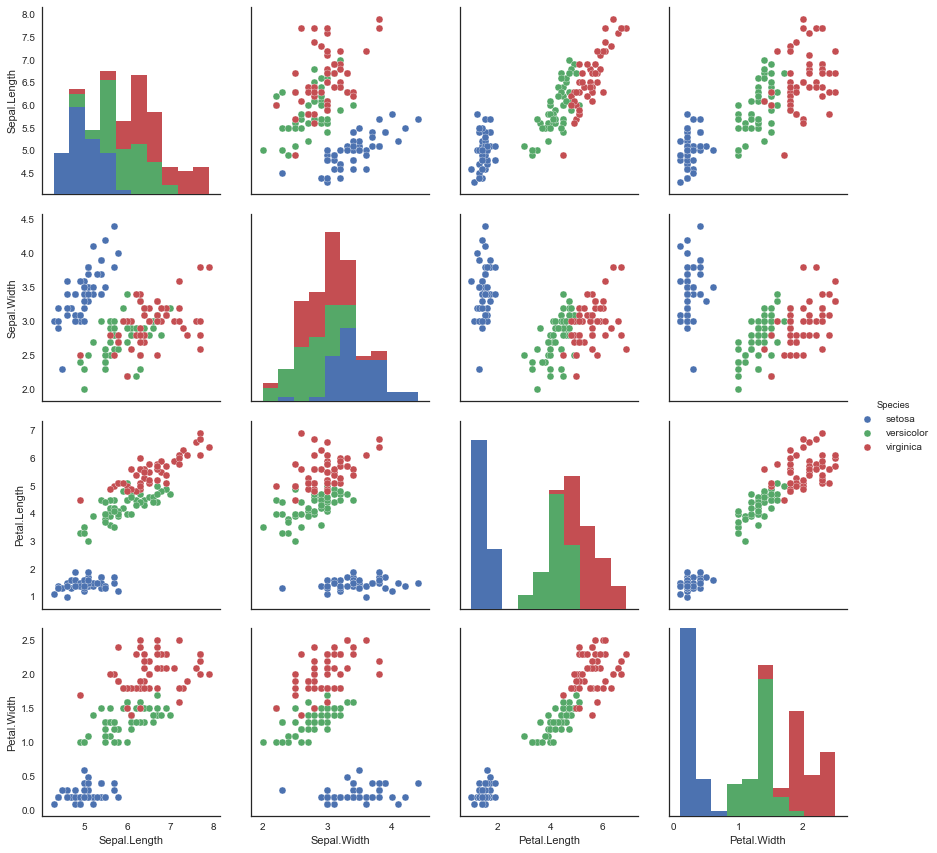

In [39]:
sns.pairplot(df.drop("Unnamed: 0", axis=1), hue="Species", size=3)


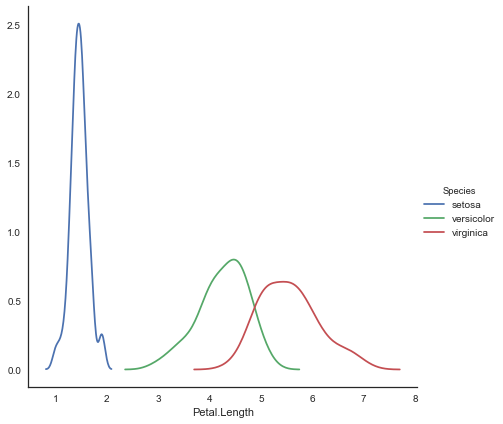

In [42]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "Petal.Length") \
   .add_legend()

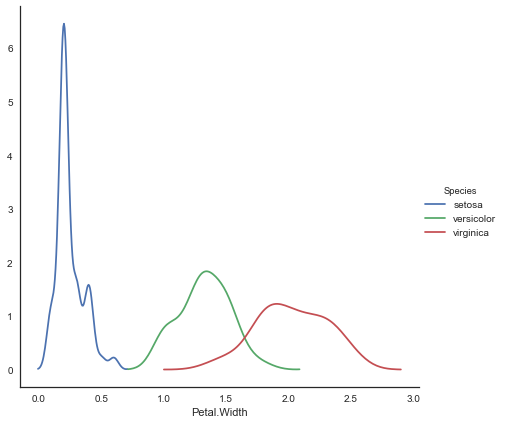

In [43]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "Petal.Width") \
   .add_legend()

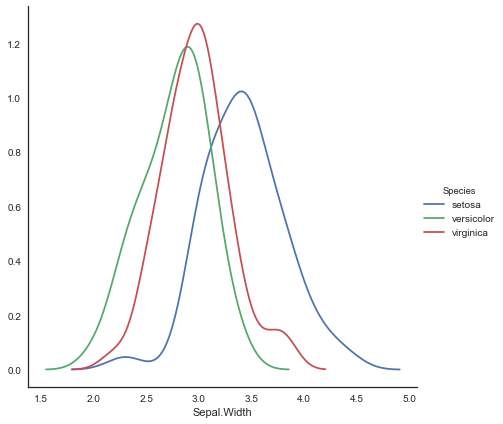

In [44]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "Sepal.Width") \
   .add_legend()

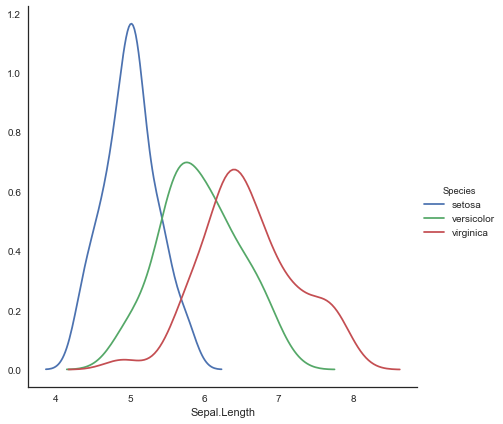

In [45]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "Sepal.Length") \
   .add_legend()

Легко отличить setosa от versicolor и virginica по длине и ширине лепестка, а также по длине чашелистика.
По ширине чашелистика все сорта похожи, хотя у setosa ширина по-меньше.
Versicolor и virginica похожи по всем параметрам.

# 3. Разделить на train и test.

In [290]:
#petal = np.array(df[["Petal.Length","Petal.Width"]])
#sepal = np.array(df[["Sepal.Length","Sepal.Width"]])

key = {'setosa':1,'versicolor':2,'virginica':3}
Y = df['Species'].map(key)
#print Y

In [224]:
#X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(sepal,Y,test_size=0.2,random_state=42)

#X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(petal,Y,test_size=0.2,random_state=42)

In [225]:
#print X_train_S.shape, X_test_S.shape, y_train_S.shape, y_test_S.shape

(120L, 2L) (30L, 2L) (120L,) (30L,)


In [291]:
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:,:5], df['Species'], test_size=0.3, random_state=15)

In [293]:
len(X_train), len(X_test), len(y_train), len(y_test)

(105, 45, 105, 45)

In [ ]:
#X_train.describe()

# 4. На train обучить DecisionTreeClassifier.

In [294]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4,presort=True) 
model.fit(X_train, y_train)
print('Training Accuracy Sepal = {}'.format(model.score(X_train, y_train)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test, y_test)))

Training Accuracy Sepal = 1.0
Testing  Accuracy Sepal = 0.977777777778


# 5. Предсказать результаты для test, записать их в переменную y_pred.
# 6. Имея y_pred и y_test (результат п.5), построить classification_report. Напечатать, объяснить, что получилось.

In [313]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.94      1.00      0.97        16
  virginica       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45



precision - точность давольно высокая. (Точность показывает, сколько из предсказанных позитивных объектов, оказались действительно позитивными.)

recall - полнота также имеет высокий коэффициент. (Полнота показывает, сколько от общего числа реальных позитивных объектов, было предсказано, как позитивный класс.)

f1-score - тоже достаточно выссокая,что неудивительно, учитывая точность и полноту.

Всё подозрительно хорошо, видимо, классификатор не совсем хорошо справился с задачей.

# 7. Построить confusion_matrix. Объяснить, что значат элементы этой матрицы.

Confusion matrix, without normalization
[[15  0  0]
 [ 0 16  0]
 [ 0  1 13]]


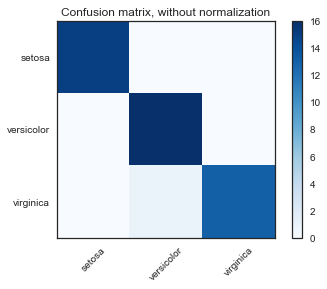

In [304]:
np.set_printoptions(precision=2)

cnf = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf, classes=['setosa', 'versicolor', 'virginica'],
                      title='Confusion matrix, without normalization')

plt.show()

Смотри на диагональ, это - TRUE

15-это кол-во правильных предсказаний, что setosa- это setosa


16- это кол-во правильных предсказаний, что versicolor- это versicolor


13- это кол-во правильных предсказаний, что virginica- это virginica


1-это кол-во неправильных предсказаний, то естьпо факту это была virginic, a прог-а предсказала, что это versicolor